## Project Stage-1 Task-3

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the Covid 19 Merged data

In [2]:
covidMerged_df= pd.read_csv("../data/covid_large.csv")

### Data Preparation

In [3]:
# Remove the rows that conatin county name as "statewide unallocated"
covidMerged_df= covidMerged_df[covidMerged_df['County Name'] != 'statewide unallocated']

### Data Filtering

In [4]:
#Filter all rows which are in the state of "North Carolina"
NC_data= covidMerged_df[covidMerged_df['State']=="NC"]
NC_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
456462,NC,37001,alamance county,2020-01-22,0,0,169509
456463,NC,37001,alamance county,2020-01-23,0,0,169509
456464,NC,37001,alamance county,2020-01-24,0,0,169509
456465,NC,37001,alamance county,2020-01-25,0,0,169509
456466,NC,37001,alamance county,2020-01-26,0,0,169509
...,...,...,...,...,...,...,...
480157,NC,37199,yancey county,2020-09-10,110,0,18069
480158,NC,37199,yancey county,2020-09-11,112,0,18069
480159,NC,37199,yancey county,2020-09-12,113,0,18069
480160,NC,37199,yancey county,2020-09-13,114,0,18069


In [5]:
# Filter all the rows to get the last week's data for the state of North Carolina
NC_data_lastWeek=NC_data[NC_data['Date'].between('2020-09-07','2020-09-15',inclusive=False)]
NC_data_lastWeek

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
456692,NC,37001,alamance county,2020-09-08,3428,47,169509
456693,NC,37001,alamance county,2020-09-09,3431,47,169509
456694,NC,37001,alamance county,2020-09-10,3452,48,169509
456695,NC,37001,alamance county,2020-09-11,3502,48,169509
456696,NC,37001,alamance county,2020-09-12,3526,48,169509
...,...,...,...,...,...,...,...
480157,NC,37199,yancey county,2020-09-10,110,0,18069
480158,NC,37199,yancey county,2020-09-11,112,0,18069
480159,NC,37199,yancey county,2020-09-12,113,0,18069
480160,NC,37199,yancey county,2020-09-13,114,0,18069


### Data Aggregation

In [6]:
# Group all the records based on date and calculate the sum of the Number of Cases and the Number of Deaths
NC_groupedBy_date = NC_data_lastWeek.groupby('Date')['Num of Cases','Num of Deaths'].sum()
NC_groupedBy_date

,Num of Cases,Num of Deaths
Date,,
2020-09-08,178623,2909
2020-09-09,179526,2957
2020-09-10,180751,2990
2020-09-11,182283,3023
2020-09-12,183736,3047
2020-09-13,184929,3052
2020-09-14,185770,3060


In [7]:
NC_groupedBy_date.describe()

,Num of Cases,Num of Deaths
count,7.000000,7.000000
mean,182231.142857,3005.428571
std,2726.308336,56.370374
min,178623.000000,2909.000000
25%,180138.500000,2973.500000
50%,182283.000000,3023.000000
75%,184332.500000,3049.500000
max,185770.000000,3060.000000


### Data Visualization

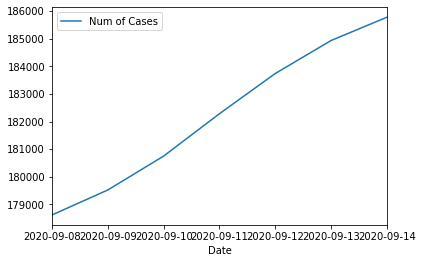

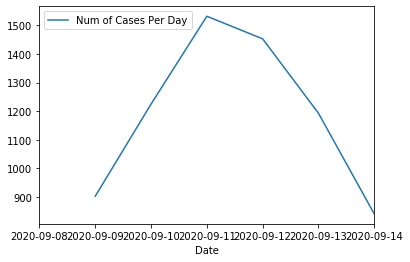

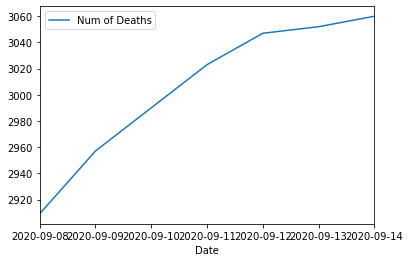

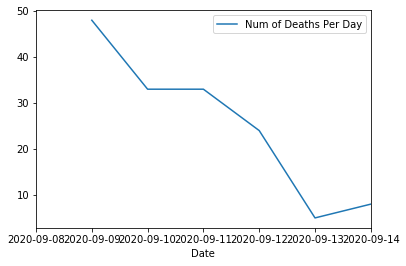

In [8]:
#plot the graph of Date Vs Number of cases and Date VS number of deaths  
NC_groupedBy_date = NC_data_lastWeek.groupby('Date',as_index=False)['Num of Cases','Num of Deaths'].sum()
NC_groupedBy_date['Num of Cases Per Day'] = NC_groupedBy_date['Num of Cases'].diff()
NC_groupedBy_date['Num of Deaths Per Day'] = NC_groupedBy_date['Num of Deaths'].diff()

NC_groupedBy_date.plot(x='Date', y='Num of Cases', kind='line')
NC_groupedBy_date.plot(x='Date', y='Num of Cases Per Day', kind='line')
NC_groupedBy_date.plot(x='Date', y='Num of Deaths', kind='line')
NC_groupedBy_date.plot(x='Date', y='Num of Deaths Per Day', kind='line')

### Data Analysis : Data trends for last week of the data
From the above graphs we notice that the total number of cases of Covid-19 are increasing in the state of North Carolina in the last week.
Also we notice that the total number of death are increasing in the state of North Carolina in the last week. The number of covid-19 cases per day increased initially from 9th september to 11th september and then it started to decrease.
The number of covid-19 cases per day is decreasing.

### Read and Display  the Census Demographic ACS enrichment data

In [9]:
demographic_df =pd.read_csv("../data/demographicData.csv")
demographic_df1 =pd.read_csv("../data/demographicData.csv",header=1)
#Display Data Types of the variables
demographic_df1.dtypes

id                                                                                                   object
Geographic Area Name                                                                                 object
Estimate!!SEX AND AGE!!Total population                                                               int64
Margin of Error!!SEX AND AGE!!Total population                                                       object
Percent!!SEX AND AGE!!Total population                                                                int64
                                                                                                     ...   
Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male      float64
Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female                     int64
Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female              int64
Percent!!CITIZEN, VOTING AGE

In [10]:
#Display Enrichment data
demographic_df.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,...,DP05_0087PE,DP05_0087PM,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM
0,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total po...,...,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P..."
1,0500000US01003,"Baldwin County, Alabama",223234,*****,223234,(X),109192,1466,48.9,0.7,...,171344,(X),80874,1076,47.2,0.6,90470,1507,52.8,0.6
2,0500000US01015,"Calhoun County, Alabama",113605,*****,113605,(X),54285,701,47.8,0.6,...,87872,(X),41162,477,46.8,0.4,46710,739,53.2,0.4
3,0500000US01043,"Cullman County, Alabama",83768,*****,83768,(X),40579,905,48.4,1.1,...,63818,(X),30623,245,48.0,0.6,33195,683,52.0,0.6
4,0500000US01049,"DeKalb County, Alabama",71513,*****,71513,(X),35688,884,49.9,1.2,...,49295,(X),24299,850,49.3,1.4,24996,808,50.7,1.4


In [11]:
# Display Covid-19 merged data
covidMerged_df

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
237,AL,1001,autauga county,2020-01-22,0,0,55869
238,AL,1001,autauga county,2020-01-23,0,0,55869
239,AL,1001,autauga county,2020-01-24,0,0,55869
240,AL,1001,autauga county,2020-01-25,0,0,55869
241,AL,1001,autauga county,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...
757210,WY,56045,weston county,2020-09-10,21,0,6927
757211,WY,56045,weston county,2020-09-11,21,0,6927
757212,WY,56045,weston county,2020-09-12,23,0,6927
757213,WY,56045,weston county,2020-09-13,23,0,6927


### Data preperation before merging covid-19 data with the enrichment dataset

In [12]:
#Seperate the County Name and the State from the Name column
demographic_df[['County Name','State']] = pd.DataFrame(demographic_df.NAME.str.split(',',expand=True))
demographic_df

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,...,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM,County Name,State
0,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total po...,...,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",Geographic Area Name,None
1,0500000US01003,"Baldwin County, Alabama",223234,*****,223234,(X),109192,1466,48.9,0.7,...,80874,1076,47.2,0.6,90470,1507,52.8,0.6,Baldwin County,Alabama
2,0500000US01015,"Calhoun County, Alabama",113605,*****,113605,(X),54285,701,47.8,0.6,...,41162,477,46.8,0.4,46710,739,53.2,0.4,Calhoun County,Alabama
3,0500000US01043,"Cullman County, Alabama",83768,*****,83768,(X),40579,905,48.4,1.1,...,30623,245,48.0,0.6,33195,683,52.0,0.6,Cullman County,Alabama
4,0500000US01049,"DeKalb County, Alabama",71513,*****,71513,(X),35688,884,49.9,1.2,...,24299,850,49.3,1.4,24996,808,50.7,1.4,DeKalb County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,0500000US72113,"Ponce Municipio, Puerto Rico",131881,*****,131881,(X),63269,*****,48.0,*****,...,50442,255,47.5,0.3,55731,560,52.5,0.3,Ponce Municipio,Puerto Rico
837,0500000US72127,"San Juan Municipio, Puerto Rico",318441,*****,318441,(X),145575,*****,45.7,*****,...,110694,1561,44.9,0.4,136074,1985,55.1,0.4,San Juan Municipio,Puerto Rico
838,0500000US72135,"Toa Alta Municipio, Puerto Rico",72025,*****,72025,(X),34516,776,47.9,1.1,...,27592,2,47.2,0.1,30804,2,52.8,0.1,Toa Alta Municipio,Puerto Rico
839,0500000US72137,"Toa Baja Municipio, Puerto Rico",74271,*****,74271,(X),34594,*****,46.6,*****,...,27177,455,45.5,0.4,32541,422,54.5,0.4,Toa Baja Municipio,Puerto Rico


In [13]:
# Select the columns which provide significatnt information. The columns selected are as follows:
demographic_colSelected_df = demographic_df.loc[:,['GEO_ID','County Name','State','DP05_0001E','DP05_0002E','DP05_0003E','DP05_0004E','DP05_0005E','DP05_0006E','DP05_0007E','DP05_0008E','DP05_0009E','DP05_0010E','DP05_0011E','DP05_0012E','DP05_0013E','DP05_0014E','DP05_0015E','DP05_0016E','DP05_0017E','DP05_0018E','DP05_0030E','DP05_0031E','DP05_0037E','DP05_0038E','DP05_0039E','DP05_0044E','DP05_0052E']]
demographic_colSelected_df.shape

(841, 28)

In [14]:
# Change the County names to lower case for matching it with covid-19 data set and to make it look uniform
demographic_colSelected_df['County Name']=demographic_colSelected_df['County Name'].apply(lambda cn: cn.lower().strip())
demographic_colSelected_df

,GEO_ID,County Name,State,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
0,id,geographic area name,None,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex r...,Estimate!!SEX AND AGE!!Total population!!Under...,Estimate!!SEX AND AGE!!Total population!!5 to ...,Estimate!!SEX AND AGE!!Total population!!10 to...,...,Estimate!!SEX AND AGE!!Total population!!75 to...,Estimate!!SEX AND AGE!!Total population!!85 ye...,Estimate!!SEX AND AGE!!Total population!!Media...,Estimate!!SEX AND AGE!!Total population!!65 ye...,Estimate!!SEX AND AGE!!Total population!!65 ye...,Estimate!!RACE!!Total population!!One race!!White,Estimate!!RACE!!Total population!!One race!!Bl...,Estimate!!RACE!!Total population!!One race!!Am...,Estimate!!RACE!!Total population!!One race!!Asian,Estimate!!RACE!!Total population!!One race!!Na...
1,0500000US01003,baldwin county,Alabama,223234,109192,114042,95.7,10616,12826,14373,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
2,0500000US01015,calhoun county,Alabama,113605,54285,59320,91.5,6699,5534,7774,...,6595,1863,39.6,8743,11813,82323,25226,201,225,85
3,0500000US01043,cullman county,Alabama,83768,40579,43189,94.0,5310,4563,5906,...,4722,1572,41.9,6934,8489,N,N,N,N,N
4,0500000US01049,dekalb county,Alabama,71513,35688,35825,99.6,4578,4292,5519,...,3933,920,37.7,5359,6579,59305,688,792,17,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,0500000US72113,ponce municipio,Puerto Rico,131881,63269,68612,92.2,5355,6438,8104,...,10392,3399,42.3,12825,17249,108065,8321,36,0,0
837,0500000US72127,san juan municipio,Puerto Rico,318441,145575,172866,84.2,12071,14774,15677,...,23087,14475,44.5,30138,44645,183816,41261,401,1475,109
838,0500000US72135,toa alta municipio,Puerto Rico,72025,34516,37509,92.0,1553,3295,5931,...,2518,1907,42.1,4851,5929,N,N,N,N,N
839,0500000US72137,toa baja municipio,Puerto Rico,74271,34594,39677,87.2,2691,3059,4892,...,4887,1971,42.0,6343,8743,57304,9848,0,0,0


In [15]:
#Select all the rows except for the 0th row as it represent another form of column names
demographic_rowColSelected_df=demographic_colSelected_df.iloc[1:,:]
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Slice the GEO_ID to obtain the countyFIPS which is used later for merging
demographic_rowColSelected_df['GEO_ID']=demographic_rowColSelected_df['GEO_ID'].str.slice(start=9)

In [17]:
# Cast the GEO_ID to int64 
demographic_rowColSelected_df['GEO_ID'] = demographic_rowColSelected_df['GEO_ID'].astype('int64')
demographic_rowColSelected_df['GEO_ID'].dtypes


dtype('int64')

### Display the rows and colums selected from Census Demographic ACS enrichment data

In [18]:
demographic_rowColSelected_df

,GEO_ID,County Name,State,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
1,1003,baldwin county,Alabama,223234,109192,114042,95.7,10616,12826,14373,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
2,1015,calhoun county,Alabama,113605,54285,59320,91.5,6699,5534,7774,...,6595,1863,39.6,8743,11813,82323,25226,201,225,85
3,1043,cullman county,Alabama,83768,40579,43189,94.0,5310,4563,5906,...,4722,1572,41.9,6934,8489,N,N,N,N,N
4,1049,dekalb county,Alabama,71513,35688,35825,99.6,4578,4292,5519,...,3933,920,37.7,5359,6579,59305,688,792,17,339
5,1051,elmore county,Alabama,81209,40060,41149,97.4,4272,6638,3812,...,3862,1154,39.0,5713,7048,61634,17768,204,884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,72113,ponce municipio,Puerto Rico,131881,63269,68612,92.2,5355,6438,8104,...,10392,3399,42.3,12825,17249,108065,8321,36,0,0
837,72127,san juan municipio,Puerto Rico,318441,145575,172866,84.2,12071,14774,15677,...,23087,14475,44.5,30138,44645,183816,41261,401,1475,109
838,72135,toa alta municipio,Puerto Rico,72025,34516,37509,92.0,1553,3295,5931,...,2518,1907,42.1,4851,5929,N,N,N,N,N
839,72137,toa baja municipio,Puerto Rico,74271,34594,39677,87.2,2691,3059,4892,...,4887,1971,42.0,6343,8743,57304,9848,0,0,0


### Merge the Convid-19 dataset with the enrichment data set

In [19]:
#Mergeing on the common CountyFIPS using inner join
merged_data_df=pd.merge(covidMerged_df, demographic_rowColSelected_df, how='inner', left_on='countyFIPS', right_on='GEO_ID')
merged_data_df

,State_x,countyFIPS,County Name_x,Date,Num of Cases,Num of Deaths,population,GEO_ID,County Name_y,State_y,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
0,AL,1003,baldwin county,2020-01-22,0,0,223234,1003,baldwin county,Alabama,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
1,AL,1003,baldwin county,2020-01-23,0,0,223234,1003,baldwin county,Alabama,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
2,AL,1003,baldwin county,2020-01-24,0,0,223234,1003,baldwin county,Alabama,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
3,AL,1003,baldwin county,2020-01-25,0,0,223234,1003,baldwin county,Alabama,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
4,AL,1003,baldwin county,2020-01-26,0,0,223234,1003,baldwin county,Alabama,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196468,WY,56025,natrona county,2020-09-10,335,2,79858,56025,natrona county,Wyoming,...,3910,1214,38.7,5765,6908,74769,1024,840,787,0
196469,WY,56025,natrona county,2020-09-11,347,2,79858,56025,natrona county,Wyoming,...,3910,1214,38.7,5765,6908,74769,1024,840,787,0
196470,WY,56025,natrona county,2020-09-12,356,2,79858,56025,natrona county,Wyoming,...,3910,1214,38.7,5765,6908,74769,1024,840,787,0
196471,WY,56025,natrona county,2020-09-13,368,2,79858,56025,natrona county,Wyoming,...,3910,1214,38.7,5765,6908,74769,1024,840,787,0


In [20]:
merged_data_df.shape

(196473, 35)

### Remove the extra County name column and display the final merged data (Covid-19 data merged with demographics data)

In [21]:
#Remove the extra County Name, State_y and GEO_ID column 
merged_data_df=merged_data_df.drop(['County Name_y','GEO_ID','State_y'],axis=1)


In [22]:
merged_data_df=merged_data_df.rename(columns={'State_x':'State','County Name_x':'County Name'})
merged_data_df

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,DP05_0001E,DP05_0002E,DP05_0003E,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
0,AL,1003,baldwin county,2020-01-22,0,0,223234,223234,109192,114042,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
1,AL,1003,baldwin county,2020-01-23,0,0,223234,223234,109192,114042,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
2,AL,1003,baldwin county,2020-01-24,0,0,223234,223234,109192,114042,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
3,AL,1003,baldwin county,2020-01-25,0,0,223234,223234,109192,114042,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
4,AL,1003,baldwin county,2020-01-26,0,0,223234,223234,109192,114042,...,14425,4345,43.0,21573,26115,190912,18338,2428,2160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196468,WY,56025,natrona county,2020-09-10,335,2,79858,79858,40278,39580,...,3910,1214,38.7,5765,6908,74769,1024,840,787,0
196469,WY,56025,natrona county,2020-09-11,347,2,79858,79858,40278,39580,...,3910,1214,38.7,5765,6908,74769,1024,840,787,0
196470,WY,56025,natrona county,2020-09-12,356,2,79858,79858,40278,39580,...,3910,1214,38.7,5765,6908,74769,1024,840,787,0
196471,WY,56025,natrona county,2020-09-13,368,2,79858,79858,40278,39580,...,3910,1214,38.7,5765,6908,74769,1024,840,787,0


### Export the merged data to CSV file

In [23]:
merged_data_df.to_csv('../data/mergedeEnrichmentData.csv',index=False)